# Task01 賽題理解

## 一、賽題目標  
### 1. 題目：提供二手車相關信息，目標為預測二手車價格。  
### 2. 分析：  
價格由車輛、買賣方，及市場狀況決定，拆解可能各因素，並由此思考可能提供預測信息的特徵。

**<車輛因素>**  
1.原車主使用汽車目的(家庭自用/租賃/運營)  
2.車況(是否曾損壞/車齡/公里數)  
3.車型(小轎車/SUV/貨車)  
4.車牌類型(車牌限行)

**<買賣雙方>**  
1.買賣雙方出價及談價空間  

**<市場因素>**  
1.交易時間(是否在汽車買賣旺季或淡季)  
2.交易地點(該地區供需狀況)  

## 二、賽題數據

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)

### 訓練集

In [8]:
# 讀取訓練集
train = pd.read_csv('./raw_data/used_car_train_20200313.csv',sep=' ')

In [19]:
# 訓練集字段　> 共31個字段
print('Training Data Columns:\n{}'.format(train.columns))

Training Data Columns:
Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')


根據賽題數據提供的字段表如下:  
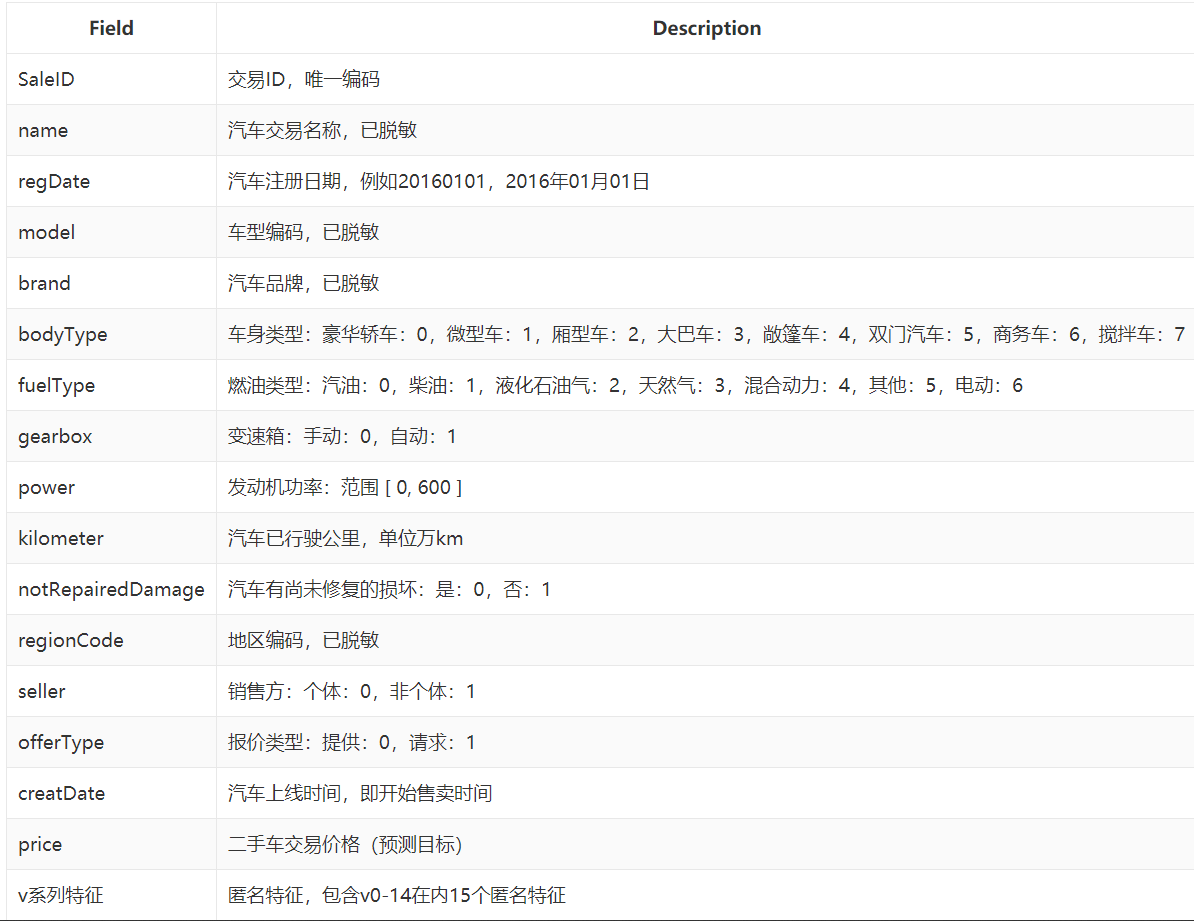

In [21]:
# 訓練集大小 > 共15萬筆
print('Training Data Shape = {}'.format(train.shape))

Training Data Shape = (150000, 31)


In [33]:
# 訓練集數據樣例
print('Training Data Samples:\n{}'.format(train.loc[:2]))

Training Data Samples:
   SaleID   name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0    736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1   2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2  14874  20040403  115.0     15       1.0       0.0      0.0    163   

   kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
0       12.5               0.0        1046       0          0   20160404   
1       15.0                 -        4366       0          0   20160309   
2       12.5               0.0        2806       0          0   20160402   

   price        v_0       v_1       v_2       v_3       v_4       v_5  \
0   1850  43.357796  3.966344  0.050257  2.159744  1.143786  0.235676   
1   3600  45.305273  5.236112  0.137925  1.380657 -1.422165  0.264777   
2   6222  45.978359  4.823792  1.319524 -0.998467 -0.996911  0.251410   

        v_6       v_7       v_8       v_9      v_10      v

### 測試集

In [29]:
# 讀取測試集
test = pd.read_csv('./raw_data/used_car_testA_20200313.csv',sep=' ')

In [30]:
# 測試集字段 > 共30個字段,比訓練集少字段 'price'(也就是預測目標)
print('Testing Data Columns:\n{}'.format(test.columns))

Testing Data Columns:
Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')


In [31]:
# 測試集大小 > 共5萬筆
print('Testing Data Shape = {}'.format(test.shape))

Testing Data Shape = (50000, 30)


In [34]:
# 測試集數據樣例
print('Testing Data Samples:\n{}'.format(test.loc[:2]))

Testing Data Samples:
   SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0  150000   66932  20111212  222.0      4       5.0       1.0      1.0    313   
1  150001  174960  19990211   19.0     21       0.0       0.0      0.0     75   
2  150002    5356  20090304   82.0     21       0.0       0.0      0.0    109   

   kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
0       15.0               0.0        1440       0          0   20160329   
1       12.5               1.0        5419       0          0   20160404   
2        7.0               0.0        5045       0          0   20160308   

         v_0       v_1       v_2       v_3       v_4       v_5       v_6  \
0  49.593127  5.246568  1.001130 -4.122264  0.737532  0.264405  0.121800   
1  42.395926 -3.253950 -1.753754  3.646605 -0.725597  0.261745  0.000000   
2  45.841370  4.704178  0.155391 -1.118443 -0.229160  0.260216  0.112081   

        v_7       v_8       v_9      v_10  

## 三、評測標準 - MAE
評價標準為MAE，MAE越小說明模型預測越準確。  
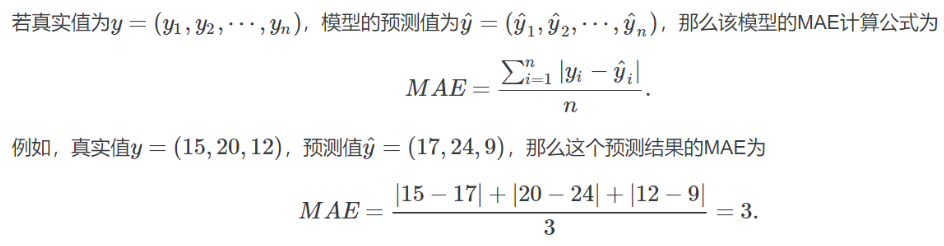